In [3]:
import cv2
import numpy as np 
from tensorflow.python.keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv2D, AveragePooling2D, Flatten, MaxPool2D, Dropout
from tensorflow.python.keras import Sequential

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [6]:
x_train.shape

(60000, 28, 28, 1)

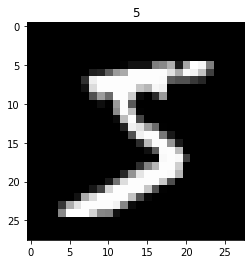

In [7]:
plt.imshow(x_train[0], cmap='gray')
plt.title(y_train[0])
plt.show()

In [8]:
x_train = x_train.reshape((-1, 28, 28, 1))

In [9]:
x_train.shape

(60000, 28, 28, 1)

In [10]:
model = Sequential()

model.add(Conv2D(filters=60, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu'))

model.add(Conv2D(filters=60, kernel_size=(5, 5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=30, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=30, kernel_size=(3, 3), activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss="sparse_categorical_crossentropy", optimizer='adam', metrics=['acc'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 24, 24, 60)        1560      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 20, 20, 60)        90060     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 10, 10, 60)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 30)          16230     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 30)          8130      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 30)          0         
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 30)          0

In [11]:
history = model.fit(
    x_train, y_train,
    steps_per_epoch=2000,
    epochs=20,
    validation_data=(x_test, y_test),
    shuffle=False
)

Epoch 1/20
2000/2000 [==============================] - 145s 72ms/step - loss: 0.4293 - acc: 0.8751 - val_loss: 0.1472 - val_acc: 0.9581
Epoch 2/20
2000/2000 [==============================] - 138s 69ms/step - loss: 0.1622 - acc: 0.9529 - val_loss: 0.0828 - val_acc: 0.9749
Epoch 3/20
2000/2000 [==============================] - 139s 69ms/step - loss: 0.1338 - acc: 0.9610 - val_loss: 0.0829 - val_acc: 0.9743
Epoch 4/20
2000/2000 [==============================] - 399s 200ms/step - loss: 0.1230 - acc: 0.9645 - val_loss: 0.0654 - val_acc: 0.9798
Epoch 5/20
2000/2000 [==============================] - 132s 66ms/step - loss: 0.1132 - acc: 0.9666 - val_loss: 0.0499 - val_acc: 0.9825
Epoch 6/20
2000/2000 [==============================] - 132s 66ms/step - loss: 0.1151 - acc: 0.9671 - val_loss: 0.0586 - val_acc: 0.9822
Epoch 7/20
2000/2000 [==============================] - 131s 66ms/step - loss: 0.1062 - acc: 0.9699 - val_loss: 0.0610 - val_acc: 0.9807
Epoch 8/20
2000/2000 [==================

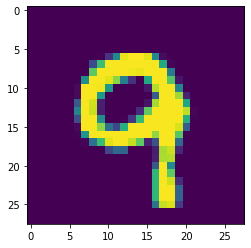

In [31]:
plt.imshow(x_test[99])
plt.show()

In [32]:
test = x_test[99].reshape(-1, 28, 28, 1)

In [33]:
model.predict_classes(test)

array([9], dtype=int64)

In [17]:
model.save('Digit Recognition Model.h5')